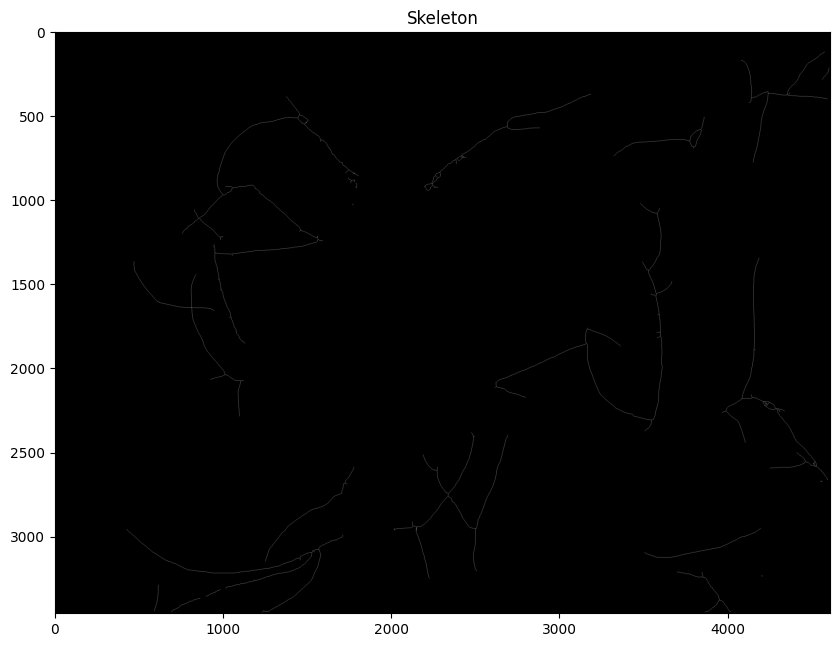

In [24]:
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from scipy import ndimage
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize
from scipy.ndimage import gaussian_filter
from utils.image_utils import load_image_ts, reduce_resolution


# Assume 'output' is the output from your semantic segmentation model
output = cv2.imread('../datasets/niab/EXP01/Top_Images/Masked_Dataset_Corrected/masks/Exp01_Block01_Image07_Pot035.jpg', cv2.IMREAD_GRAYSCALE)

# Threshold the output to get a binary image
_, binary_output = cv2.threshold(output, 127, 255, cv2.THRESH_BINARY)

# Convert the binary image to bool
binary_output = binary_output.astype(bool)

# Apply skeletonization
skeleton = skeletonize(binary_output)

# Convert the output to a suitable format for watershed
# output = (output * 255).astype('uint8')

# Visualize the skeleton
plt.figure(figsize=(10,10))
plt.imshow(skeleton, cmap='gray')
plt.title('Skeleton')
plt.show()





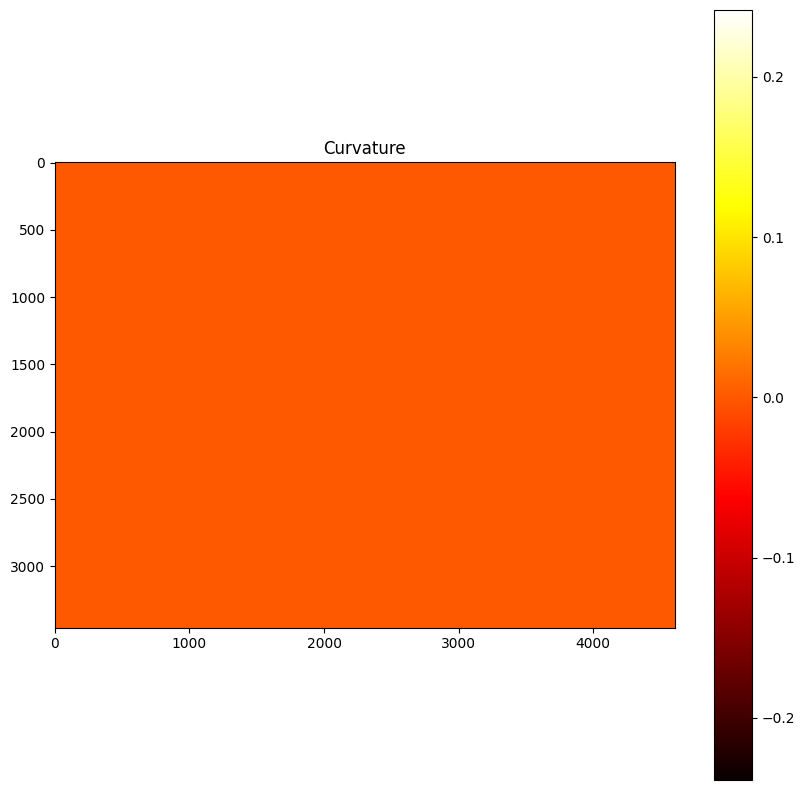

In [43]:
# Compute the curvature by convolving the skeleton with a Laplacian of Gaussian filter
curvature = gaussian_filter(skeleton.astype(float), sigma=1, order=2)

# Visualize the curvature
plt.figure(figsize=(10,10))
plt.imshow(curvature, cmap='hot')
plt.colorbar()
plt.title('Curvature')
plt.show()

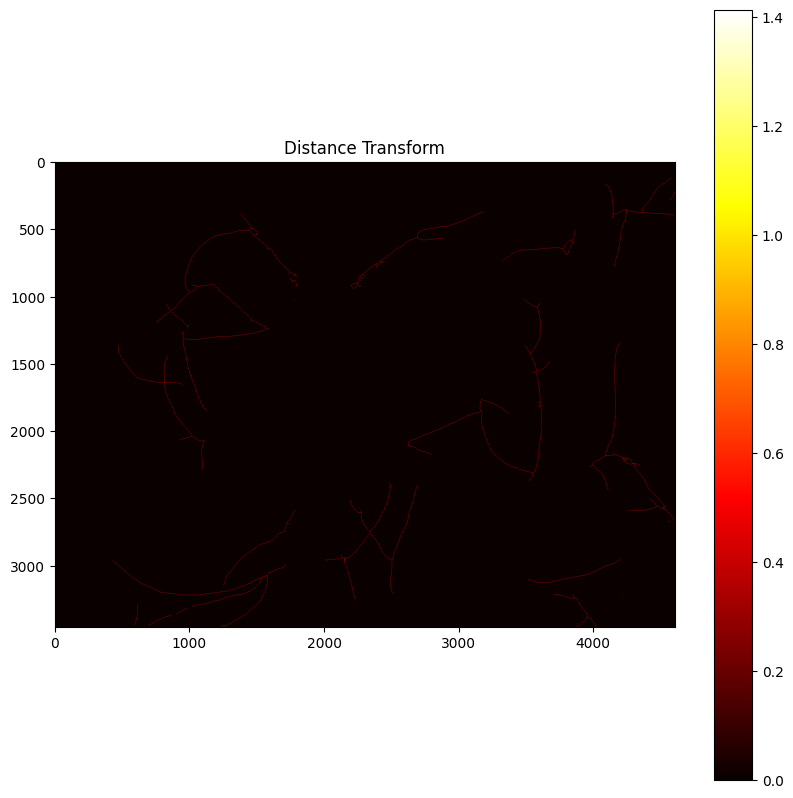

In [23]:
# convert skeletojn to uint8
skeleton = (skeleton * 255).astype('uint8')


# Compute the distance transform of the output
distance = ndimage.distance_transform_edt(skeleton)

# Visualize the distance transform
plt.figure(figsize=(10,10))
plt.imshow(distance, cmap='hot')
plt.title('Distance Transform')
plt.colorbar()
plt.show()

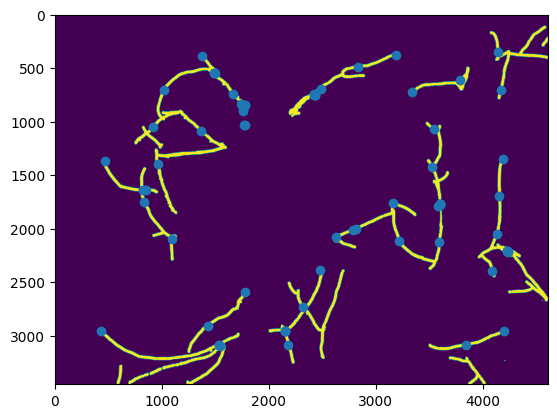

In [32]:
# Identify each local maximum
coordinates = peak_local_max(distance, labels=output, min_distance=350)

# plot the local maxima
plt.imshow(output)
plt.scatter(coordinates[:, 1], coordinates[:, 0])
plt.show()



[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73]


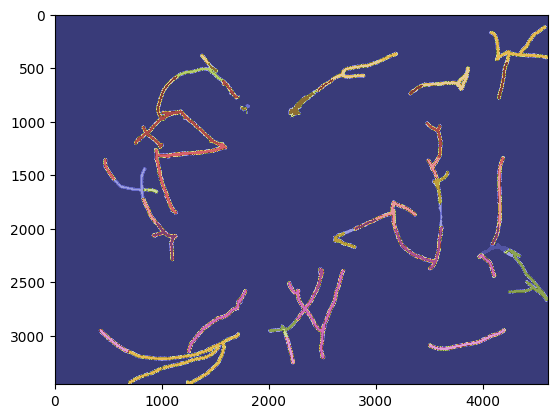

In [33]:
# # Create a marker image for the watershed algorithm
markers = np.zeros(distance.shape, dtype=np.uint32)
for i, (r, c) in enumerate(coordinates):
    markers[r, c] = i + 1

# Apply the watershed algorithm
labels = watershed(-distance, markers, mask=output)
print(np.unique(labels))

# display the output

plt.imshow(labels, cmap='tab20b')
plt.show()
# cv2.imshow('output', labels)

In [25]:
# Assume 'output' is the output from your semantic segmentation model
output = cv2.imread('../datasets/niab/EXP01/Top_Images/Masked_Dataset_Corrected/masks/Exp01_Block01_Image07_Pot035.jpg', cv2.IMREAD_GRAYSCALE)

# Threshold the output to get a binary image
_, binary_output = cv2.threshold(output, 127, 255, cv2.THRESH_BINARY)

# Convert the binary image to bool
binary_output = binary_output.astype(bool)



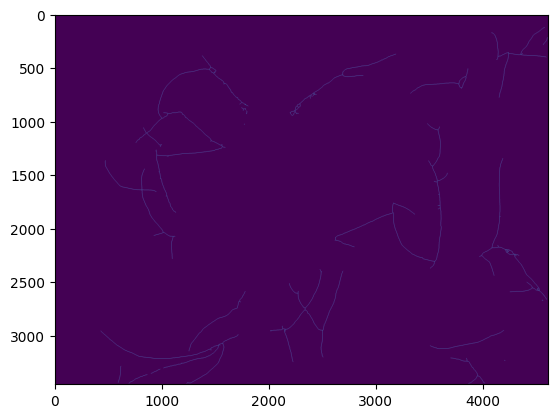

In [26]:
# Apply skeletonization
skeleton = skeletonize(binary_output)

plt.imshow(skeleton)
plt.show()